<a href="https://colab.research.google.com/github/varaprasadh/computer_vision/blob/master/wood_logs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install ultralytics opencv-python roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="nHugI0rLV8VU8TfOoSS6")
project = rf.workspace("nanomatrix").project("wood-log-counting")
version = project.version(8)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wood-Log-Counting-8 in yolov11:: 100%|██████████| 772/772 [00:00<00:00, 869.93it/s]


In [5]:
dataset.location

'/content/Wood-Log-Counting-8'

In [4]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
GPU name: Tesla T4


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/data.yml",  # path to dataset YAML
    epochs=100,
    imgsz=640,
    device=0,  # or device='cuda:0' for specifying the GPU index
    batch=32,      # adjust batch size as per GPU memory
    workers=8,    # adjust workers as per CPU cores
    cache=True
)


# Evaluate model performance on the validation set
metrics = model.val()

# Perform object detection on an image
#results = model("test/images/IMG_0124_JPG.rf.1d24a667927a37353769461ca34bb284.jpg")
#results[0].show()

# Export the model to ONNX format
path = model.export(format="onnx")


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line

100%|██████████| 755k/755k [00:00<00:00, 39.8MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Wood-Log-Counting-8/train/labels... 270 images, 0 backgrounds, 0 corrupt: 100%|██████████| 270/270 [00:00<00:00, 726.68it/s]

train: New cache created: /content/Wood-Log-Counting-8/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9952, len(boxes) = 26989. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.3GB RAM): 100%|██████████| 270/270 [00:01<00:00, 264.07it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Wood-Log-Counting-8/valid/labels... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<00:00, 674.67it/s]

val: New cache created: /content/Wood-Log-Counting-8/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 476, len(boxes) = 8780. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.1GB RAM): 100%|██████████| 75/75 [00:00<00:00, 100.81it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.2G       1.87      3.418      1.489       1829        640: 100%|██████████| 9/9 [00:09<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]

                   all         75       8780      0.212      0.543      0.168      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.3G      1.592      2.935      1.195       1933        640: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         75       8780      0.302      0.773      0.365       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      14.6G      1.595       2.22      1.108       1956        640: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all         75       8780      0.319      0.818      0.383      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.3G      1.575      1.552      1.087       2035        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         75       8780      0.322      0.824      0.391      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.9G       1.51      1.165      1.071       1557        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all         75       8780      0.347      0.888      0.632      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      14.4G       1.46      1.002      1.074       1287        640: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         75       8780      0.396      0.914      0.776      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.4G      1.447     0.9349      1.063       1926        640: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         75       8780      0.943      0.787      0.924      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100        14G      1.332     0.8407      1.024       1641        640: 100%|██████████| 9/9 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.15it/s]

                   all         75       8780       0.91      0.917      0.943      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.3G      1.281     0.7881      1.022       1610        640: 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         75       8780      0.896      0.926      0.937      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.9G      1.304      0.798      1.028       1548        640: 100%|██████████| 9/9 [00:05<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         75       8780      0.862      0.922      0.932      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.9G      1.287     0.7488       1.01       1763        640: 100%|██████████| 9/9 [00:04<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         75       8780      0.891      0.924      0.937      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.3G      1.348     0.7685      1.039       1776        640: 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]


                   all         75       8780       0.84      0.927        0.9      0.551

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.12G      1.359     0.7701      1.041       2414        640: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         75       8780      0.879      0.924      0.933      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        12G      1.352     0.7509      1.035       1515        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         75       8780      0.837      0.936      0.896      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100        13G      1.245     0.7124      1.015       1870        640: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.35it/s]

                   all         75       8780      0.877      0.931      0.935      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.3G      1.295     0.7266      1.015       1951        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         75       8780      0.869       0.93      0.912       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      12.7G      1.296     0.7172      1.026       1685        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         75       8780      0.902      0.924      0.945      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      13.6G      1.332     0.7362      1.039       1383        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         75       8780      0.884       0.93      0.921      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        12G      1.252     0.7024      1.008       1620        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all         75       8780      0.886      0.931      0.927      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100        11G      1.299     0.7184      1.035       1414        640: 100%|██████████| 9/9 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         75       8780      0.857      0.932      0.853      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        13G      1.258     0.7013          1       2400        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         75       8780      0.891       0.93      0.939      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      14.8G      1.224     0.6895      1.011       1195        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         75       8780      0.898      0.925      0.943      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      14.9G      1.191     0.6775     0.9929       1359        640: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         75       8780      0.884      0.933      0.918      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.2G      1.212     0.6629     0.9974       2387        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         75       8780      0.904       0.93      0.948      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.5G      1.222     0.6694      1.006       2379        640: 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         75       8780      0.883      0.927      0.921      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.8G      1.198     0.6562       0.99       2432        640: 100%|██████████| 9/9 [00:05<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         75       8780      0.889      0.931      0.935      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.5G      1.182     0.6404     0.9786       1772        640: 100%|██████████| 9/9 [00:04<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         75       8780      0.893      0.927      0.933      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.8G      1.185     0.6382     0.9897       1749        640: 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         75       8780      0.895      0.931      0.946      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.2G      1.182     0.6355     0.9804       2074        640: 100%|██████████| 9/9 [00:04<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         75       8780      0.904      0.927      0.934      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      10.7G      1.208     0.6591      1.015       1011        640: 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.30s/it]

                   all         75       8780      0.915      0.927       0.95      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      14.5G      1.149     0.6283     0.9806       1886        640: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         75       8780      0.893      0.933      0.936      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      10.7G      1.185     0.6099     0.9809       1821        640: 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         75       8780      0.886       0.93      0.926      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.7G      1.131     0.5964     0.9777       2324        640: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         75       8780      0.913      0.929      0.952      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.7G      1.229     0.6283       0.99       2732        640: 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]


                   all         75       8780      0.893      0.931      0.922      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      10.6G      1.185     0.6081      0.984       1990        640: 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         75       8780      0.904      0.937      0.949      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        12G      1.204     0.6386     0.9989       1458        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         75       8780      0.892      0.938      0.939      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.4G      1.189     0.6179     0.9876       1766        640: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.33s/it]

                   all         75       8780      0.893      0.935      0.943      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.2G      1.126     0.5968     0.9704       2259        640: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         75       8780      0.894      0.928      0.931      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.4G       1.15     0.5943     0.9744       1787        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.16s/it]

                   all         75       8780      0.907      0.929      0.949      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.9G       1.14     0.5891     0.9794       1641        640: 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         75       8780       0.91      0.937      0.953      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      12.1G      1.188     0.6024     0.9799       2188        640: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


                   all         75       8780      0.898      0.933      0.924      0.714

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        12G      1.173     0.5969     0.9856       1662        640: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         75       8780      0.911      0.931      0.951      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      12.9G      1.111     0.5793     0.9687       1678        640: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]


                   all         75       8780       0.91      0.932      0.951      0.721

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      10.5G      1.169     0.5978     0.9833       1933        640: 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         75       8780      0.906      0.934      0.948      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      14.2G      1.107     0.5875     0.9664       1576        640: 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         75       8780      0.897      0.936      0.944      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      12.4G      1.157     0.5843     0.9807       1605        640: 100%|██████████| 9/9 [00:05<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         75       8780      0.903      0.935       0.95      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.1G      1.103     0.5633     0.9577       2236        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         75       8780      0.898      0.933       0.94      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      13.5G      1.058     0.5519     0.9528       1579        640: 100%|██████████| 9/9 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]

                   all         75       8780      0.899      0.931      0.943      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      12.2G      1.102     0.5694     0.9688       1737        640: 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         75       8780      0.915      0.928      0.953      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      12.2G      1.168     0.5846     0.9786       2780        640: 100%|██████████| 9/9 [00:04<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]

                   all         75       8780      0.912       0.93      0.949      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      12.3G      1.162     0.5902     0.9613       2185        640: 100%|██████████| 9/9 [00:05<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         75       8780      0.903      0.926      0.944      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.2G      1.123     0.5755     0.9765       1921        640: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         75       8780      0.905      0.933       0.95      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.57G      1.146       0.57      0.982       1603        640: 100%|██████████| 9/9 [00:05<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.07s/it]

                   all         75       8780      0.905      0.933      0.949      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      14.1G      1.122     0.5644      0.964       2574        640: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         75       8780      0.907      0.936      0.952       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      15.2G      1.109     0.5576     0.9698       1259        640: 100%|██████████| 9/9 [00:05<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         75       8780      0.893      0.937      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      14.8G      1.111     0.5576     0.9712       1729        640: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         75       8780      0.897      0.934      0.946      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      15.3G      1.146     0.5672     0.9751       2482        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         75       8780      0.898      0.936      0.947      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.4G       1.12     0.5592     0.9587       2222        640: 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         75       8780      0.906      0.935      0.952      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.28G      1.131     0.5564     0.9652       2179        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]


                   all         75       8780      0.914      0.928       0.95      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      14.7G      1.096     0.5496     0.9565       1911        640: 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         75       8780      0.903      0.926      0.943      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         9G      1.137     0.5729     0.9774       1461        640: 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         75       8780      0.909      0.933      0.952      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      14.6G      1.133     0.5643     0.9679       1659        640: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         75       8780      0.909      0.933       0.95      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.31G      1.067     0.5339     0.9523       1767        640: 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         75       8780      0.909      0.934      0.951      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.4G      1.086     0.5297     0.9537       1998        640: 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]

                   all         75       8780      0.899       0.93       0.94      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100        12G      1.036     0.5237     0.9413       2140        640: 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         75       8780      0.902      0.931      0.945      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      13.1G      1.088     0.5462     0.9603       2080        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         75       8780      0.905      0.934      0.949      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.5G      1.075     0.5345     0.9591       1732        640: 100%|██████████| 9/9 [00:04<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         75       8780      0.898      0.937      0.944      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      13.3G      1.078     0.5342     0.9492       1945        640: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all         75       8780      0.888      0.936      0.937      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.4G      1.093     0.5341     0.9613       2216        640: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all         75       8780      0.883      0.935      0.937      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      13.7G      1.073      0.529     0.9511       1612        640: 100%|██████████| 9/9 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]


                   all         75       8780      0.893      0.938      0.947      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      13.3G      1.071     0.5299     0.9485       1942        640: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         75       8780      0.887      0.938      0.936      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      12.9G      1.033     0.5184       0.94       2835        640: 100%|██████████| 9/9 [00:04<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]


                   all         75       8780      0.895      0.935      0.942      0.718

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      13.7G      1.058     0.5235     0.9482       1939        640: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         75       8780        0.9      0.933      0.945      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      15.2G      1.047     0.5163     0.9457       1849        640: 100%|██████████| 9/9 [00:04<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         75       8780      0.907      0.932       0.95      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      12.6G      1.028     0.5091     0.9438       1912        640: 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         75       8780       0.91      0.927      0.952      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        13G      1.057     0.5208     0.9481       2207        640: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         75       8780      0.921      0.926      0.953      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100        11G      1.051     0.5242     0.9462       1979        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.23s/it]

                   all         75       8780      0.914      0.935      0.954       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.5G      1.037     0.5126     0.9345       1689        640: 100%|██████████| 9/9 [00:04<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         75       8780      0.912      0.931      0.952      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      13.7G      1.015     0.5241     0.9432       1421        640: 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all         75       8780      0.908      0.931      0.952      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      15.5G      1.013     0.5104     0.9339       1941        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         75       8780      0.908      0.928      0.952      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G      1.039     0.5152     0.9452       1559        640: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


                   all         75       8780      0.904      0.931      0.952      0.744

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.9G      1.023     0.5134     0.9384       1858        640: 100%|██████████| 9/9 [00:05<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         75       8780      0.908      0.932      0.952      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      13.5G      1.026     0.5013     0.9369       2034        640: 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         75       8780       0.91      0.931      0.953      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      14.5G      1.064     0.5303     0.9574       1453        640: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]


                   all         75       8780       0.91      0.928      0.951      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.8G      1.009     0.5032      0.935       2152        640: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.78it/s]

                   all         75       8780      0.907      0.933      0.951      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      13.5G      1.018     0.5025     0.9395       1574        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.22s/it]

                   all         75       8780      0.903      0.936      0.951      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      13.2G     0.9768     0.4854     0.9236       1746        640: 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         75       8780      0.901      0.932      0.948      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      15.5G      1.002     0.4937     0.9324       1956        640: 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


                   all         75       8780      0.898      0.934      0.946      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.9G     0.9947     0.4937     0.9322       1847        640: 100%|██████████| 9/9 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         75       8780      0.898      0.932      0.946      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      12.5G     0.9999     0.5046      0.936       2046        640: 100%|██████████| 9/9 [00:04<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         75       8780      0.903      0.933      0.951      0.758


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      12.4G      1.033     0.5192     0.9542       1119        640: 100%|██████████| 9/9 [00:09<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.46it/s]

                   all         75       8780      0.904      0.934       0.95       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.41G     0.9916     0.5014     0.9303       1153        640: 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         75       8780      0.902      0.934      0.948      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      10.3G      1.009     0.5067     0.9357       1749        640: 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         75       8780      0.902      0.931      0.948      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       9.5G      0.977     0.4935     0.9338       1176        640: 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.86it/s]

                   all         75       8780      0.899      0.928      0.945      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.84G     0.9631     0.4865     0.9258       1737        640: 100%|██████████| 9/9 [00:04<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         75       8780      0.896      0.927      0.944      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      12.2G     0.9526     0.4787     0.9233       1130        640: 100%|██████████| 9/9 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.60it/s]

                   all         75       8780      0.895      0.927      0.939      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.9G     0.9685     0.4799     0.9286       1267        640: 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all         75       8780      0.896      0.929       0.94      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100        15G     0.9455     0.4729      0.916        905        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         75       8780      0.898       0.93      0.944      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.52G     0.9736     0.4845     0.9242       1448        640: 100%|██████████| 9/9 [00:04<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         75       8780      0.899       0.93      0.943      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.3G     0.9588     0.4732       0.92       1254        640: 100%|██████████| 9/9 [00:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.29s/it]


                   all         75       8780      0.897       0.93      0.942      0.742

100 epochs completed in 0.215 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


                   all         75       8780      0.904      0.934      0.951       0.76
Speed: 0.2ms preprocess, 2.5ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train2
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Wood-Log-Counting-8/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 476, len(boxes) = 8780. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 75/75 [00:00<00:00, 294.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:08<00:00,  2.78s/it]


                   all         75       8780      0.904      0.933       0.95      0.762
Speed: 0.3ms preprocess, 12.7ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/train22



FileNotFoundError: test/images/IMG_0124_JPG.rf.1d24a667927a37353769461ca34bb284.jpg does not exist

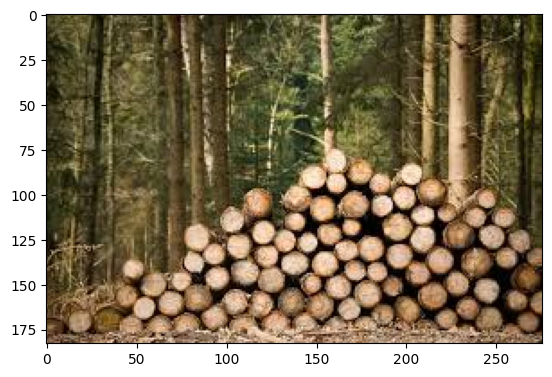


image 1/1 /content/wood_logs_1.jpeg: 448x640 89 wood-logs, 57.0ms
Speed: 1.9ms preprocess, 57.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


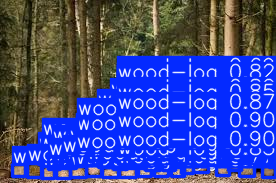

In [7]:
# test model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load a model
model = YOLO("/content/runs/detect/train2/weights/best.pt")


# img_path = "/content/woods.jpeg"
img_path = "/content/wood_logs_1.jpeg"
#img_path = "/content/packages_2.jpg"

# Evaluate model performance on the validation set
# metrics = model.val()


img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

# Perform object detection on an image
# results = model("../datasets/test/images/IMG_0124_JPG.rf.1d24a667927a37353769461ca34bb284.jpg")
results = model(img_path)
results[0].show()




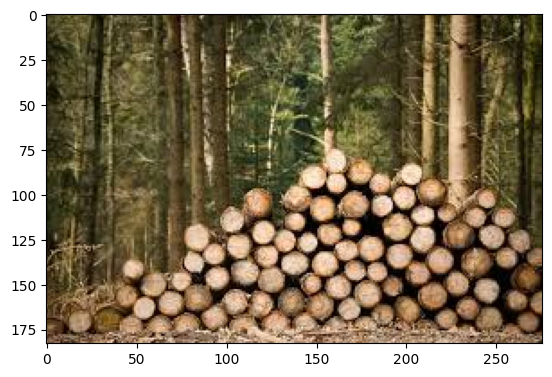


image 1/1 /content/wood_logs_1.jpeg: 448x640 89 wood-logs, 16.6ms
Speed: 2.8ms preprocess, 16.6ms inference, 3.9ms postprocess per image at shape (1, 3, 448, 640)


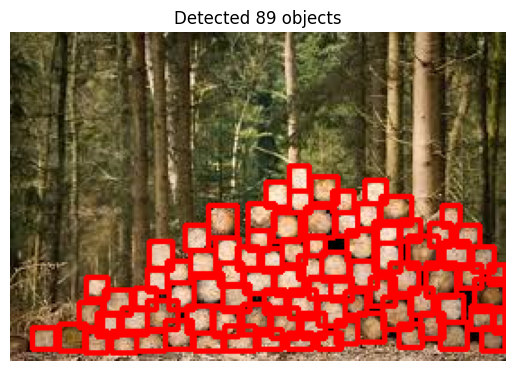

In [15]:
import matplotlib.pyplot as plt
import cv2

# Load a model
model = YOLO("/content/runs/detect/train2/weights/best.pt")

# Specify the image path
img_path = "/content/wood_logs_1.jpeg"

img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()

# Perform object detection
results = model(img_path)

# Load the image using cv2
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for matplotlib

# Extract bounding boxes
for box in results[0].boxes.xyxy:  # `xyxy` gives top-left and bottom-right coordinates
    x1, y1, x2, y2 = map(int, box)  # Convert to integers
    # Draw the rectangle on the image
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box with thickness 2

num_boxes = len(results[0].boxes)

# Display the image with bounding boxes
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.title(f"Detected {num_boxes} objects")
plt.show()
